# Climate Data Scraping: Merge Ignitions Data with Climate Data
#### Fire Atlas Dataset + NCDC GSOM + NCDC Monthly Normals

Andrew McDonald // CSE 847 // April 2021

In [51]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 25)

In [55]:
ignitions = pd.read_csv("data/usa_2016_wildfires_stations.csv")
gsom = pd.read_csv("data/ncdc_gsom_data.csv")
normal = pd.read_csv("data/ncdc_normal_mly_data.csv")

In [56]:
ignitions["month"] = pd.DatetimeIndex(ignitions["start_date"]).month
gsom["month"] = pd.DatetimeIndex(gsom["date"]).month
normal["month"] = pd.DatetimeIndex(normal["date"]).month

In [57]:
display(ignitions.head(3))
display(gsom.head(3))
display(normal.head(3))

,fire_ID,latitude,longitude,size,perimeter,start_date,start_DOY,end_date,end_DOY,duration,...,normal_mindate,normal_maxdate,normal_latitude,normal_datacoverage,normal_id,normal_elevationUnit,normal_longitude,distance_from_gsom,distance_from_normal,month
0,1,20.8438,-156.413,0.86,4.63,2016-10-26,300,2016-11-02,307,8,...,2010-01-01,2010-12-01,20.89972,1,GHCND:USW00022516,METERS,-156.42861,128.450424,6.400746,10
1,2,20.8396,-156.418,1.50,6.48,2016-10-28,302,2016-11-02,307,6,...,2010-01-01,2010-12-01,20.89972,1,GHCND:USW00022516,METERS,-156.42861,128.162642,6.747153,10
2,3,20.8105,-156.437,0.43,2.78,2016-11-29,334,2016-11-29,334,1,...,2010-01-01,2010-12-01,20.89972,1,GHCND:USW00022516,METERS,-156.42861,125.720919,9.916521,11


,date,station,AWND,CDSD,CLDD,DP01,DP10,DP1X,DSNW,DT00,...,LX03,MN03,MX03,HN04,HX04,LN04,LX04,MN04,MX04,month
0,2016-01-01,GHCND:USW00021510,3.1,188.6,188.6,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2016-02-01,GHCND:USW00021510,3.3,360.2,171.6,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,2016-03-01,GHCND:USW00021510,3.8,567.1,206.9,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


,date,station,MLY-CLDD-BASE45,MLY-CLDD-BASE50,MLY-CLDD-BASE55,MLY-CLDD-BASE57,MLY-CLDD-BASE60,MLY-CLDD-BASE70,MLY-CLDD-BASE72,MLY-CLDD-NORMAL,...,MLY-TMIN-AVGNDS-LSTH070,MLY-TMIN-NORMAL,MLY-TMIN-PRBOCC-LSTH016,MLY-TMIN-PRBOCC-LSTH020,MLY-TMIN-PRBOCC-LSTH024,MLY-TMIN-PRBOCC-LSTH028,MLY-TMIN-PRBOCC-LSTH032,MLY-TMIN-PRBOCC-LSTH036,MLY-TMIN-STDDEV,month
0,2010-01-01,GHCND:USW00022516,465.0,379.0,293.0,258.0,207.0,40.0,18.0,103.0,...,29.3,17.4,0,0,0,0,0,0,-16.9,1
1,2010-02-01,GHCND:USW00022516,418.0,340.0,262.0,231.0,184.0,35.0,16.0,89.0,...,26.9,17.2,0,0,0,0,0,0,-16.8,2
2,2010-03-01,GHCND:USW00022516,481.0,394.0,308.0,274.0,222.0,53.0,26.0,118.0,...,29.6,18.0,0,0,0,0,0,0,-17.1,3


In [58]:
ignitions.shape, gsom.shape, normal.shape

((11524, 48), (15724, 70), (16313, 80))

In [74]:
merged = pd.merge(ignitions, gsom, left_on=["gsom_id", "month"], right_on=["station", "month"])
merged = pd.merge(merged, normal, left_on=["normal_id", "month"], right_on=["station", "month"])
merged

,fire_ID,latitude,longitude,size,perimeter,start_date,start_DOY,end_date,end_DOY,duration,...,MLY-TMIN-AVGNDS-LSTH060,MLY-TMIN-AVGNDS-LSTH070,MLY-TMIN-NORMAL,MLY-TMIN-PRBOCC-LSTH016,MLY-TMIN-PRBOCC-LSTH020,MLY-TMIN-PRBOCC-LSTH024,MLY-TMIN-PRBOCC-LSTH028,MLY-TMIN-PRBOCC-LSTH032,MLY-TMIN-PRBOCC-LSTH036,MLY-TMIN-STDDEV
0,1,20.8438,-156.4130,0.86,4.63,2016-10-26,300,2016-11-02,307,8,...,-777.7,15.6,20.8,0,0,0,0,0,0,-17.3
1,2,20.8396,-156.4180,1.50,6.48,2016-10-28,302,2016-11-02,307,6,...,-777.7,15.6,20.8,0,0,0,0,0,0,-17.3
2,3,20.8105,-156.4370,0.43,2.78,2016-11-29,334,2016-11-29,334,1,...,0.3,20.4,20.0,0,0,0,0,0,0,-16.9
3,4,20.6271,-156.2470,18.65,30.56,2016-02-16,47,2016-02-20,51,5,...,27.8,28.0,10.9,0,0,0,0,0,0,-16.8
4,5,19.8063,-155.8950,7.72,12.96,2016-03-20,80,2016-03-25,85,6,...,0.1,26.6,19.7,0,0,0,0,0,0,-17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10728,56789,40.8521,-78.1691,0.43,2.78,2016-04-14,105,2016-04-14,105,1,...,29.8,30.0,1.7,212,549,840,972,999,1000,-16.3
10729,56790,40.4188,-76.7056,0.64,3.70,2015-11-14,318,2015-11-14,318,1,...,30.0,30.0,1.7,56,358,765,960,999,1000,-16.4
10730,56791,40.0271,-74.4895,0.86,4.63,2016-06-26,178,2016-07-04,186,9,...,15.4,28.6,14.8,0,0,0,0,0,25,-16.3
10731,56792,40.0063,-74.4994,3.00,9.26,2016-06-13,165,2016-06-19,171,7,...,15.4,28.6,14.8,0,0,0,0,0,25,-16.3


In [75]:
# fill snow NAs with 0s, since these are from weather stations that do not receive snow
snow_data = ["DSND", "DSNW", "EMSD", "EMSN", "SNOW"]
merged[snow_data] = merged[snow_data].fillna(0)
snow_dates = ["DYSD", "DYSN"]
merged[snow_dates] = merged[snow_dates].fillna(datetime(2016, 1, 1).date())
merged[snow_data + snow_dates]

,DSND,DSNW,EMSD,EMSN,SNOW,DYSD,DYSN
0,0.0,0.0,0.0,0.0,0.0,2016-10-31,2016-10-31
1,0.0,0.0,0.0,0.0,0.0,2016-10-31,2016-10-31
2,0.0,0.0,0.0,0.0,0.0,2016-11-30,2016-11-30
3,0.0,0.0,0.0,0.0,0.0,2016-01-01,2016-02-29
4,0.0,0.0,0.0,0.0,0.0,2016-01-01,2016-01-01
...,...,...,...,...,...,...,...
10728,3.0,3.0,25.0,30.0,89.0,2016-04-09,2016-04-09
10729,0.0,0.0,0.0,0.0,0.0,2016-11-30,2016-11-20
10730,0.0,0.0,0.0,0.0,0.0,2016-06-30,2016-06-30
10731,0.0,0.0,0.0,0.0,0.0,2016-06-30,2016-06-30


<AxesSubplot:>

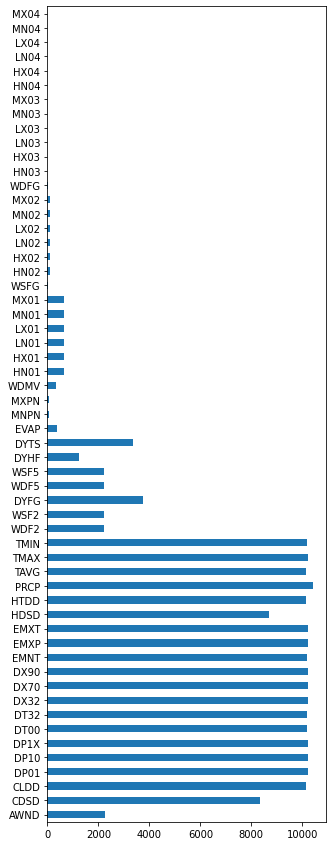

In [78]:
# sanity check to ensure values merged well
df = merged.describe().T
incomplete = df[df["count"] < merged.shape[0]]

fig, ax = plt.subplots(figsize=(5, 15))
incomplete["count"].plot(kind="barh")

In [79]:
# save merged table
merged.to_csv("data/usa_2016_wildfires_climate.csv", index=False)